<span style="font-size:24pt; color:blue; font-family: 'Times New Roman'">Notebook 
    <span style="color:green;"> for xploring and plotting *nc data of the <b>Computed Scalars Paper</b> </span>
</span>
<br>  
<span style="font-size:14pt; color:black; font-family:Georgia, serif;font-style:italic">by Praveen Kumar and Sophie Nowicki.</span>  

<br>
<br>
<span style="font-family:'Courier New', monospace; font-size:14pt; color:black"> <b>Background::</b> <br>
    This is a notebook that is being created to explore the results from the 
    <a href="https://doi.org/10.5194/tc-14-3033-2020" style="color:blue; text-decoration:underline;">Seroussi et al (2020)</a> paper.   
    Data, i.e. <b>Computed Scalars</b> can be downloaded from the <a href="https://zenodo.org/records/3940766" style="color:blue; text-decoration:underline;">Zenodo DATA Repo</a>. Make sure to point your path variable appropriately.
</span>

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> Xplore::
    <span style="font-size:14pt; color:green;"> ComputedScalarsPaper *.nc data files </span>

</span>

In [1]:
import os
import fun as fn
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import fun as fn

In [2]:
path = f'../3940766/ComputedScalarsPaper'

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> List the <b>modelling group</b> names:

</span>

In [3]:
files=fn.list_files_with_names(path, [""])
#
df = pd.DataFrame(files, columns=['Model Name']).reset_index().rename(columns={'index': 'Index'})

# print(df.to_string(index=False))
# Convert the DataFrame to HTML, hide the index
html = df.to_html(index=False)
display(HTML(html))

Index,Model Name
0,.DS_Store
1,AWI
2,DOE
3,ILTS_PIK
4,IMAU
5,JPL1
6,LSCE
7,NCAR
8,PIK
9,UCIJPL


###### Remove _DS_STORE_ from above, ignore its listing 

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> List details of the <b>ice flow model and experiments</b> names:
</span>

In [4]:
path = f'../3940766/ComputedScalarsPaper/' 
#
df_folders = fn.list_folders_as_multilevel_df_grouped(path)
html = df_folders.to_html()
display(HTML(html))

,Level_1,Level_2,Level_3,Level_4,Level_5,Level_6_Subfolders
0,..,3940766,ComputedScalarsPaper,[/],None,None
1,..,3940766,ComputedScalarsPaper,AWI,[/],None
2,..,3940766,ComputedScalarsPaper,AWI,PISM1,"[/, ctrl_proj_open, ctrl_proj_std, exp01, exp02, exp03, exp04, exp05, exp06, exp07, exp08, exp09, exp10, exp11, exp12, exp13, expA1, expA2, expA3, expA4, expA5, expA6, expA7, expA8, hist_open_08, hist_std]"
3,..,3940766,ComputedScalarsPaper,DOE,[/],None
4,..,3940766,ComputedScalarsPaper,DOE,MALI,"[/, ctrl_proj_std, exp05, exp06, exp07, exp08, exp09, exp10, exp12, exp13, hist_std]"
5,..,3940766,ComputedScalarsPaper,ILTS_PIK,[/],None
6,..,3940766,ComputedScalarsPaper,ILTS_PIK,SICOPOLIS,"[/, ctrl_proj_std, exp05, exp06, exp07, exp08, exp09, exp10, exp12, exp13, expA5, expA6, expA7, expA8, hist_std]"
7,..,3940766,ComputedScalarsPaper,IMAU,[/],None
8,..,3940766,ComputedScalarsPaper,IMAU,IMAUICE1,"[/, ctrl_proj_std, exp05, exp06, exp07, exp08, exp09, exp10, exp12, exp13, hist_std]"
9,..,3940766,ComputedScalarsPaper,IMAU,IMAUICE2,"[/, ctrl_proj_std, exp05, exp06, exp07, exp08, exp09, exp10, exp12, exp13, expA5, expA6, expA7, expA8, hist_std]"


<span style="font-size: 12pt; color: blue; font-family: 'Times New Roman';">
The table above needs to be refined. </span>  
<ol>
    <li>Remove the [/] listing in the table. Not sure why its listing its own self</li>
    <li>Display as a nested DF, remove duplicate entires e.g. level 1 etc</li>
    <li>Final layout should be no>cspaper>grp>model</li>
    <li>Customize for max user readibility</li>
</ol>


In [5]:
# # This is a more detailed view, it displays using nested dictionaries. 
 
# path = f'../3940766/ComputedScalarsPaper/'  
# df_folders = fn.list_folders_as_multilevel_df_sorted(path)
# html = df_folders.to_html()
# display(HTML(html))

<span style="font-size: 22pt; color: blue; font-family: 'Times New Roman';">
List the variables </span>  

In [6]:
GroupID='UTAS'; IceFlowModel='ElmerIce'; experiment='ctrl_proj_std'

path2file=f'../3940766/ComputedScalarsPaper/{GroupID}/{IceFlowModel}/{experiment}/'

import os
# List all files in the directory
files = [f for f in os.listdir(path2file) if os.path.isfile(os.path.join(path2file, f))]

# Print the files
for file in files:
    print(file.split('_')[1])

smb
iareagr
bmbfl
smbgr
iareafl
ivaf
icearea
ivol


<span style="font-size: 18pt; color: black; font-family: 'Times New Roman';"> NOTE: For details on the Description of variables, refer to text in Zenodo DATA Repo: <a href="https://zenodo.org/records/3940766" style="color:blue; text-decoration:underline;">computed scalars</a></span>  

<span style="font-size: 16pt; color: black; font-family: 'Times New Roman';">This notebook is built for <span style="background-color: yellow; color: green;"> ivaf - ice volume above floatation [m^3]</span></span>

<br>
<span style="font-size:24pt; color:blue; font-family: 'Times New Roman';"> READ ::
    <span style="font-size:16pt; color:green;"> ComputedScalarsPaper *.nc data files </span>

</span>

In [7]:
GroupID='AWI'
IceFlowModel='PISM1'
experiment='ctrl_proj_open'
var='ivaf' #ice volume above floatation [m^3]
#
path2file=f'../3940766/ComputedScalarsPaper/{GroupID}/{IceFlowModel}/{experiment}/computed_{var}_AIS_{GroupID}_{IceFlowModel}_{experiment}.nc'
nc_data = xr.open_dataset(path2file, engine='netcdf4', decode_times=False)
nc_data

<xarray.Dataset>
Dimensions:         (time: 86)
Coordinates:
  * time            (time) float32 2.016e+03 2.017e+03 ... 2.1e+03 2.101e+03
Data variables: (12/24)
    ivaf            (time) float32 ...
    ivaf_sector_1   (time) float32 ...
    ivaf_sector_2   (time) float32 ...
    ivaf_sector_3   (time) float32 ...
    ivaf_sector_4   (time) float32 ...
    ivaf_sector_5   (time) float32 ...
    ...              ...
    ivaf_sector_18  (time) float32 ...
    ivaf_region_1   (time) float32 ...
    ivaf_region_2   (time) float32 ...
    ivaf_region_3   (time) float32 ...
    rhoi            float64 ...
    rhow            float64 ...
Attributes:
    Author:       Helene Seroussi (helene.seroussi@jpl.nasa.gov)
    Project:      ISMIP6 Antarctica Projections
    Description:  Rescaled scalars from 2d fields
    Grid:         Datum = WGS84, earth_radius = 6378137., earth_eccentricity ...
    proj:         +proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_...
    proj4:        +init=epsg:3031
    Date:         16-Sep-2020

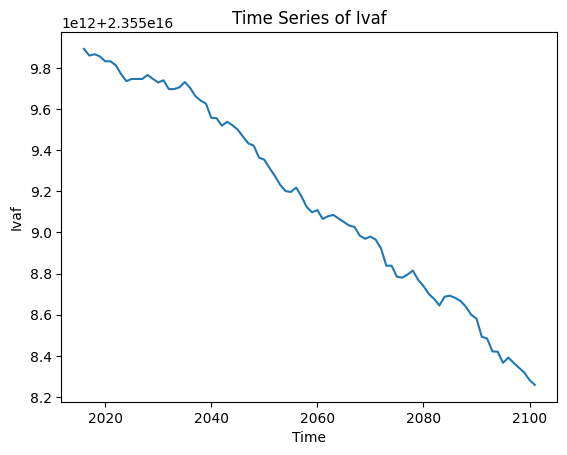

In [8]:
variable_name = 'ivaf'
data = nc_data[variable_name]
# Plot the data
data.plot()
plt.xlabel('Time')  
plt.ylabel(variable_name.capitalize())  
plt.title(f'Time Series of {variable_name.capitalize()}')
plt.show()

In [9]:
print(data[0].values)

2.3559893e+16
